In [1]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
VOCAB = pd.read_csv('VOCAB.csv', index_col='term_str')
VOCAB

,n,p,i,n_chars,max_pos,n_pos,cat_pos,dfidf,mean_tfidf
term_str,,,,,,,,,
quality,1369,0.009497,6.718315,7,NN,3,"{'NNS', 'NNP', 'NN'}",22.920115,0.020423
castings,1228,0.008519,6.875126,8,NNS,3,"{'NNS', 'NNP', 'NNPS'}",44.741763,0.056828
products,1199,0.008318,6.909605,8,NNS,4,"{'NNS', 'NNP', 'NN', 'NNPS'}",33.358238,0.024701
casting,1194,0.008283,6.915634,7,NNP,2,"{'NNP', 'NN'}",45.154499,0.051122
contact,944,0.006549,7.254578,7,NNP,2,"{'NNP', 'NN'}",35.475367,0.022390
...,...,...,...,...,...,...,...,...,...
beane,1,0.000007,17.137221,5,NNP,1,{'NNP'},2.477121,0.000550
lucas,1,0.000007,17.137221,5,NNP,1,{'NNP'},2.477121,0.000550
hernandez,1,0.000007,17.137221,9,NNP,1,{'NNP'},2.477121,0.000550


In [3]:
SALEX = pd.read_csv('salex_nrc.csv', index_col='term_str')
SALEX

,nrc_anger,nrc_anticipation,nrc_disgust,nrc_fear,nrc_joy,nrc_negative,nrc_positive,nrc_sadness,nrc_surprise,nrc_trust,nrc_sentiment
term_str,,,,,,,,,,,
abandon,0,0,0,1,0,1,0,1,0,0,-1
abandoned,1,0,0,1,0,1,0,1,0,0,-1
abandonment,1,0,0,1,0,1,0,1,1,0,-1
abduction,0,0,0,1,0,1,0,1,1,0,-1
aberration,0,0,1,0,0,1,0,0,0,0,-1
...,...,...,...,...,...,...,...,...,...,...,...
young,0,1,0,0,1,0,1,0,1,0,1
youth,1,1,0,1,1,0,1,0,1,0,1
zeal,0,1,0,0,1,0,1,0,1,1,1


In [4]:
BOW = pd.read_csv('BOW.csv', index_col=['company_id', 'term_str'])
BOW

n
company_id term_str      
1          access       4
           accessories  1
           accuracy     1
           act          1
           actions      1
...                    ..
1222       wall         1
           works        1
           x            3
           years        1
           zinc         8

[57298 rows x 1 columns]

In [5]:
TFIDF = pd.read_csv('TFIDF.csv', index_col='company_id')
TFIDF

,today,machine,work,steel,variety,email,cast,engineering,inc,range,...,oems,forge,july,gate,jet,footprint,j,flange,resume,contractors
company_id,,,,,,,,,,,,,,,,,,,,,
1,-0.011544,-0.017719,-0.012737,0.071572,0.066224,0.088042,0.162926,-0.015846,0.113212,-0.011010,...,-0.003239,-0.015122,-0.002513,-0.004676,-0.003063,-0.001975,-0.002617,-0.008426,-0.002221,0.021561
5,-0.011544,-0.017719,-0.012737,0.086841,-0.008526,-0.019116,-0.021139,0.022513,-0.032783,0.059059,...,-0.003239,-0.015122,-0.002513,-0.004676,-0.003063,-0.001975,-0.002617,-0.008426,-0.002221,-0.002626
10,0.054641,-0.017719,-0.012737,-0.022144,-0.008526,-0.019116,0.189705,0.006824,-0.032783,0.051106,...,-0.003239,-0.015122,-0.002513,-0.004676,-0.003063,-0.001975,-0.002617,-0.008426,-0.002221,-0.002626
12,-0.011544,-0.017719,-0.012737,-0.022144,0.029331,0.065305,0.026666,-0.015846,-0.032783,-0.011010,...,-0.003239,-0.015122,-0.002513,-0.004676,-0.003063,-0.001975,-0.002617,-0.008426,-0.002221,-0.002626
14,-0.011544,-0.017719,-0.012737,-0.022144,-0.008526,-0.019116,0.000031,0.006916,-0.032783,-0.011010,...,-0.003239,-0.015122,-0.002513,-0.004676,-0.003063,-0.001975,-0.002617,-0.008426,-0.002221,-0.002626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1211,0.003521,-0.002653,0.002329,-0.022144,-0.008526,-0.019116,-0.021139,0.030597,-0.032783,-0.011010,...,-0.003239,-0.015122,-0.002513,-0.004676,-0.003063,-0.001975,-0.002617,-0.008426,-0.002221,-0.002626
1212,-0.011544,-0.017719,-0.012737,-0.022144,-0.008526,-0.019116,-0.021139,0.012510,-0.032783,-0.011010,...,-0.003239,-0.015122,-0.002513,-0.004676,-0.003063,-0.001975,-0.002617,-0.008426,-0.002221,-0.002626
1216,-0.011544,-0.017719,-0.012737,-0.014488,-0.008526,0.109865,-0.021139,-0.015846,-0.025399,-0.011010,...,-0.003239,-0.015122,-0.002513,-0.004676,-0.003063,0.023714,-0.002617,-0.008426,-0.002221,-0.002626


In [6]:
DOCS = pd.read_csv("DOCS.csv")
DOCS

,company_id,link_num,doc_str
0,1,0,manufacturer hardware custom metal crafters wa...
1,1,1,found please url spelling capitalization troub...
2,1,2,buckles cmc design manufacturing standard cust...
3,1,3,clasps cmc design manufacturing standard custo...
4,1,4,cmc design manufacturing standard custom loop ...
...,...,...,...
2258,1219,10,prototype to production magnesium typical prop...
2259,1219,11,are protocast inc p e avecommerce city made in...
2260,1222,0,home about pentacast services contact more pen...
2261,1222,1,home about pentacast services contact more ser...


### Sentiment and emotion values as features in VOCAB

In [7]:
# die, hood are not negative words in our context
SALEX.columns = [col.replace('nrc_','') for col in SALEX.columns]
SALEX['polarity'] = SALEX.positive - SALEX.negative

V = pd.concat([VOCAB.reset_index().set_index('term_str'), SALEX], join='inner', axis=1) 
V

,n,p,i,n_chars,max_pos,n_pos,cat_pos,dfidf,mean_tfidf,anger,...,disgust,fear,joy,negative,positive,sadness,surprise,trust,sentiment,polarity
term_str,,,,,,,,,,,,,,,,,,,,,
die,563,0.003906,8.000230,3,NNP,3,"{'NNS', 'NNP', 'NN'}",44.436266,0.057658,0,...,0,1,0,1,0,1,0,0,-1,-1
production,532,0.003691,8.081939,10,NN,2,"{'NNP', 'NN'}",45.286313,0.025593,0,...,0,0,0,0,1,0,0,0,1,1
quote,328,0.002275,8.779669,5,NNP,2,"{'NNP', 'NN'}",44.624791,0.022468,0,...,0,0,0,1,1,0,1,0,0,0
art,228,0.001582,9.304331,3,NNP,2,"{'NNP', 'NN'}",38.559334,0.018658,0,...,0,0,1,0,1,1,1,0,1,1
iron,194,0.001346,9.537308,4,NN,2,"{'NNP', 'NN'}",41.111045,0.020483,0,...,0,0,0,0,1,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
friend,1,0.000007,17.137221,6,NN,1,{'NN'},2.477121,0.000435,0,...,0,0,1,0,1,0,0,1,1,1
luck,1,0.000007,17.137221,4,NN,1,{'NN'},2.477121,0.000435,0,...,0,0,1,0,1,0,1,0,1,1
hood,1,0.000007,17.137221,4,NN,1,{'NN'},2.477121,0.000127,1,...,1,1,0,1,0,0,0,0,-1,-1


In [26]:
V.to_csv("VOCAB_EMTION.csv")

In [28]:
V[V.index == "die"]["anger anticipation disgust fear joy sadness surprise trust polarity".split()]

,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,polarity
term_str,,,,,,,,,
die,0,0,0,1,0,1,0,0,-1


In [30]:
V[V.index == "fabrication"]["anger anticipation disgust fear joy sadness surprise trust polarity".split()]

,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,polarity
term_str,,,,,,,,,
fabrication,0,0,0,0,0,0,0,1,-1


In [31]:
V[V.index == "aluminum"]["anger anticipation disgust fear joy sadness surprise trust polarity".split()]

,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,polarity
term_str,,,,,,,,,


In [11]:
V['polarity'].value_counts()

 1    393
-1    234
 0     46
Name: polarity, dtype: int64

In [12]:
V[V['polarity'] == 1].index[:50]

Index(['production', 'art', 'iron', 'united', 'management', 'assembly',
       'delivery', 'expertise', 'general', 'success', 'strength', 'magnet',
       'leader', 'corporation', 'level', 'center', 'resources', 'content',
       'career', 'share', 'improvement', 'paragon', 'assurance', 'president',
       'statement', 'grant', 'integrity', 'top', 'guide', 'opportunity',
       'vision', 'addresses', 'electric', 'excellence', 'food', 'rod', 'money',
       'partnership', 'warranty', 'defense', 'structure', 'compliance',
       'reliability', 'pride', 'laser', 'organization', 'inquiry', 'green',
       'medical', 'shopping'],
      dtype='object', name='term_str')

In [13]:
V[V['polarity'] == -1].index[:50]

Index(['die', 'resistance', 'fabrication', 'case', 'wear', 'shell', 'cad',
       'belt', 'stone', 'john', 'force', 'cutting', 'waste', 'problem', 'shot',
       'resistant', 'challenge', 'damage', 'error', 'black', 'limited',
       'blast', 'fee', 'risk', 'government', 'lost', 'damages', 'loss',
       'demand', 'bottom', 'conflict', 'competition', 'emergency', 'pound',
       'war', 'rail', 'shock', 'boy', 'lower', 'crushing', 'pollution',
       'cross', 'cage', 'disability', 'rob', 'suspension', 'cancer', 'upset',
       'failure', 'hit'],
      dtype='object', name='term_str')

In [14]:
V[V['polarity'] == 0].index[:50]

Index(['quote', 'operation', 'weight', 'instructions', 'treat', 'gray',
       'mother', 'diverse', 'cap', 'congress', 'court', 'ultimate', 'alerts',
       'revolution', 'sterling', 'retirement', 'lord', 'bear', 'highest',
       'larger', 'influence', 'mystery', 'cement', 'urgency', 'outstanding',
       'testament', 'wilderness', 'watch', 'lightning', 'rule', 'dominion',
       'petroleum', 'intervention', 'armed', 'probation', 'inoculation',
       'dependent', 'remains', 'lace', 'weigh', 'buck', 'intense', 'escape',
       'changeable', 'cop', 'spider'],
      dtype='object', name='term_str')

In [15]:
DTCM = BOW.n.unstack() # Create Doc-Term Count Matrix
TF = (DTCM.T / DTCM.T.max()).T

BOW['tf'] = TF.stack()
BOW['tfidf'] = TFIDF.stack()

In [16]:
emo_cols = "anger anticipation disgust fear joy sadness surprise trust polarity".split()
B = BOW.join(V[['max_pos'] + emo_cols], on='term_str', rsuffix='_v').dropna()

for col in emo_cols:
    B[col] = B[col] * B.tfidf
B

n        tf     tfidf max_pos     anger  anticipation  \
company_id term_str                                                             
1          agreement    1  0.030303  0.020094      NN  0.000000      0.000000   
           assembly     1  0.030303  0.001390      NN  0.000000      0.000000   
           belt        22  0.666667  0.500604      NN  0.500604      0.000000   
           center       4  0.121212  0.055799     NNP  0.000000      0.000000   
           content      1  0.030303  0.008869      NN  0.000000      0.000000   
...                    ..       ...       ...     ...       ...           ...   
1222       problem      1  0.071429  0.048630      NN  0.000000      0.000000   
           production   5  0.357143  0.050816      NN  0.000000      0.050816   
           strength     3  0.214286  0.095784      NN  0.000000      0.000000   
           structure    2  0.142857  0.097282      NN  0.000000      0.000000   
           success      1  0.071429  0.024996      NN  0.000000      0.024996   

                       disgust      fear       joy  sadness  surprise  \
company_id term_str                                                     
1          agreement       0.0  0.000000  0.000000  0.00000       0.0   
           assembly        0.0  0.000000  0.000000  0.00000       0.0   
           belt            0.0  0.500604  0.000000  0.00000       0.0   
           center          0.0  0.000000  0.000000  0.00000       0.0   
           content         0.0  0.000000  0.008869  0.00000       0.0   
...                        ...       ...       ...      ...       ...   
1222       problem         0.0  0.048630  0.000000  0.04863       0.0   
           production      0.0  0.000000  0.000000  0.00000       0.0   
           strength        0.0  0.000000  0.000000  0.00000       0.0   
           structure       0.0  0.000000  0.000000  0.00000       0.0   
           success         0.0  0.000000  0.024996  0.00000       0.0   

                          trust  polarity  
company_id term_str                        
1          agreement   0.020094  0.020094  
           assembly    0.001390  0.001390  
           belt        0.000000 -0.500604  
           center      0.055799  0.055799  
           content     0.008869  0.008869  
...                         ...       ...  
1222       problem     0.000000 -0.048630  
           production  0.000000  0.050816  
           strength    0.095784  0.095784  
           structure   0.097282  0.097282  
           success     0.000000  0.024996  

[2647 rows x 13 columns]

### Sentiment polarity and emotions for each document.

In [17]:
EMO_COMPANIES = B.groupby(['company_id'])[emo_cols].mean()
EMO_COMPANIES

,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,polarity
company_id,,,,,,,,,
1,0.053752,0.001678,0.000000,0.052807,0.000887,0.002747,0.003691,0.013784,-0.040700
5,0.046098,0.046098,0.000000,0.000000,0.046098,0.000000,0.046098,0.366072,-0.273875
10,0.003363,0.016300,0.006030,0.033222,0.004693,0.028893,0.002668,0.026044,0.003091
12,0.000000,0.012464,0.008730,0.004296,0.009182,0.004296,0.000000,0.028781,0.022261
14,0.000000,0.013020,0.008611,0.008762,0.021545,0.000000,0.008420,0.015504,0.041116
...,...,...,...,...,...,...,...,...,...
1211,0.000000,0.003839,0.006326,0.004470,0.007400,0.005544,0.009230,0.017897,0.025423
1212,0.000000,0.000000,0.000000,0.027126,0.000000,0.000000,0.000000,0.179757,0.152632
1216,0.003687,0.015143,0.011188,0.015596,0.013233,0.012458,0.011412,0.017690,0.001354


In [25]:
EMO_COMPANIES.to_csv("EMOTION.csv")

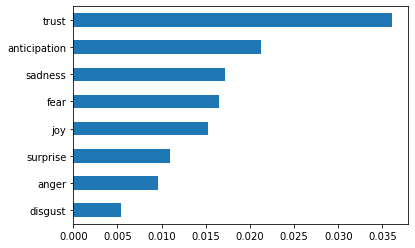

In [18]:
EMO_COMPANIES["anger anticipation disgust fear joy sadness surprise trust".split()].mean().sort_values().plot.barh();

In [19]:
EMO_COMPANIES.sort_values('anger', ascending=False)

,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,polarity
company_id,,,,,,,,,
858,0.209687,0.000000,0.209687,0.209687,0.000000,0.209687,0.000000,0.000000,-0.209687
214,0.118982,0.000000,0.118982,0.000000,0.000000,0.000000,0.000000,0.032291,-0.086692
1007,0.101245,0.033073,0.000000,0.101245,0.032855,0.068172,0.068172,0.032855,-0.002244
158,0.096854,0.000000,0.000000,0.093058,0.000000,0.044220,0.000000,0.040605,-0.100470
542,0.066158,0.021508,0.007091,0.073250,0.007091,0.073250,0.087666,0.023812,-0.049438
...,...,...,...,...,...,...,...,...,...
209,0.000000,0.077397,0.000000,0.000000,0.015568,0.000000,0.000000,0.044968,0.086707
340,0.000000,0.001091,0.000000,0.000568,0.000875,0.000000,0.000000,0.002103,0.001911
212,0.000000,0.025857,0.000000,0.000000,0.000000,0.000000,0.000000,0.117454,0.084785


In [20]:
text = " ".join(DOCS[DOCS['company_id'] == 858]['doc_str'].values)
text

'welcome to nk cutting nk cutting cc november sisters kathy mackinlay nicky van gijssel nk cutting cc company size metals engineering manufacturing purposes company growth provider cut size material customer service service clients aluminium stainless steel mild steel brass size engineering industry aluminium stainless steel mild steel brass testimonials plate cut size aluminium round bar cut size aluminium bar cut size aluminium bar cut size aluminium round bar cut size aluminium sheet cut size testimonials bar cut size bright mild steel bar cut size'

<img src = "../code/WORDCLOUD_ANGER.jpeg">

In [21]:
EMO_COMPANIES.sort_values('anticipation', ascending=False)

,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,polarity
company_id,,,,,,,,,
284,0.000000,0.687210,0.000000,0.000000,0.687210,0.687210,0.687210,0.000000,0.687210
903,0.000000,0.333344,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333344
876,0.000000,0.274055,0.048349,0.000000,0.322404,0.274055,0.274055,0.048349,0.322404
278,0.000000,0.126039,0.022907,0.008519,0.025793,0.008519,0.000000,0.154471,0.123046
49,0.000000,0.093064,0.006760,0.016685,0.093064,0.093064,0.093064,0.000000,0.069619
...,...,...,...,...,...,...,...,...,...
238,0.002581,-0.001107,0.002581,0.040347,0.001723,0.040347,0.000000,0.017463,-0.026571
908,0.000000,-0.001240,0.000000,0.000000,0.011372,0.000000,0.000000,0.079854,0.078614
435,0.000000,-0.001355,0.000000,0.000000,0.035224,0.000000,0.024276,0.061445,0.084366


In [22]:
text = " ".join(DOCS[DOCS['company_id'] == 284]['doc_str'].values)
text

'ron adamson studio artworks original western art ron adamson kootenai river lumber mining town libby montana interest art age model airplanes cars plastic decals models images models ron bark cottonwood trees teenager characters native culture clothing trappers settlers costumes nations people order ron paint end years works left birches ron sculpture s step process lot time clay model statue beginning rubber mold clay vessel wax replica clay model wax mold bronze statues pieces ron foundry step bronze statue life honkers bronze cast ron show award celebration western art year puyallup washington ron stone s alabaster pieces show exhibitions pacific northwest adventures ron carving pieces wood carving tools pages examples information ron s works instagram artwork images artwork site ron adamson authorization copyright ron adamson studio artworks ron adamson studio artworks original western art story standin corner easy winslow arizona statue web page internet years dr anthony pages in

<img src = "../code/WORDCLOUD_ANTICIAPTION.png">

In [23]:
EMO_COMPANIES.sort_values('trust', ascending=False)

,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,polarity
company_id,,,,,,,,,
5,0.046098,0.046098,0.00000,0.000000,0.046098,0.000000,0.046098,0.366072,-0.273875
246,0.000000,0.000000,0.00000,0.001522,0.000000,0.000000,0.000000,0.210526,0.053802
199,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.185813,-0.185813
1212,0.000000,0.000000,0.00000,0.027126,0.000000,0.000000,0.000000,0.179757,0.152632
740,0.000000,0.000000,0.00000,0.000000,0.075441,0.000000,0.000000,0.165705,0.165705
...,...,...,...,...,...,...,...,...,...
903,0.000000,0.333344,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333344
49,0.000000,0.093064,0.00676,0.016685,0.093064,0.093064,0.093064,0.000000,0.069619
744,0.000000,0.085335,0.00000,0.000000,0.000000,0.000000,0.085335,0.000000,0.000000


In [24]:
text = " ".join(DOCS[DOCS['company_id'] == 5]['doc_str'].values)
text

'contact information video noblitt fabricating blog industries noblitt fabricating attributes requirements industry industries road road marine contact information noblitt fabrication blog noblitt fabricating service service provider range technologies materials edge product development process products market faster noblitt fabricating turnaround engineering experience time money contact information noblitt fabrication blog noblitt fabricating manufacturer quality tubes sections sections tubes precision parts range parts segment components noblitt fabricating strip steel degree stability tolerances surface qualities contact information noblitt fabrication blog tube bending noblitt fabricating tube prototype manufacturing assortment metals carbon steel steel aluminum alloys others noblitt fabricating tolerances parts quality control package parts specifications times lead times order days weeks contact information noblitt fabrication blog capabilities square time part time crane shift 

<img src = "../code/WORDCLOUD_TRUST.png">